# Proyecto: 
## Investigación de la base de datos de películas de TMDb


### Introducción
En este proyecto de análisis de datos, exploraremos un archivo de base de datos de películas de TMDb, que cuenta con información importante de más de 10.000 películas, incluyendo detalles sobre presupuesto, ingresos, fechas de estreno, entre otros.

A lo largo de este análisis, utilizaremos diferentes herramientas y técnicas para explorar, visualizar y entender mejor los datos que contiene esta base de datos de películas. Exploraremos preguntas como ¿cuáles son las películas más populares? ¿Cuál es la relación entre el presupuesto y los ingresos de una película? ¿Cómo ha evolucionado la industria cinematográfica a lo largo del tiempo?

¡Prepárate para sumergirte en el mundo del cine y el análisis de datos con nosotros!

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

pd.set_option("display.max_columns", None) # Ajustar el ancho de las columnas
print(movie_data.head(5))


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Tipos de datos que tenemos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

print(movie_data.dtypes)


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


Ver la cantidad de datos que tenemos

In [ ]:
rows, col = movie_data.shape
print('En total hay {} peliculas y {} columnas en esta base.'.format(rows-1, col))


En total hay 10865 peliculas y 21 columnas en esta base.


Ver que columnas tienen mayor cantidad de nulls

<Axes: >

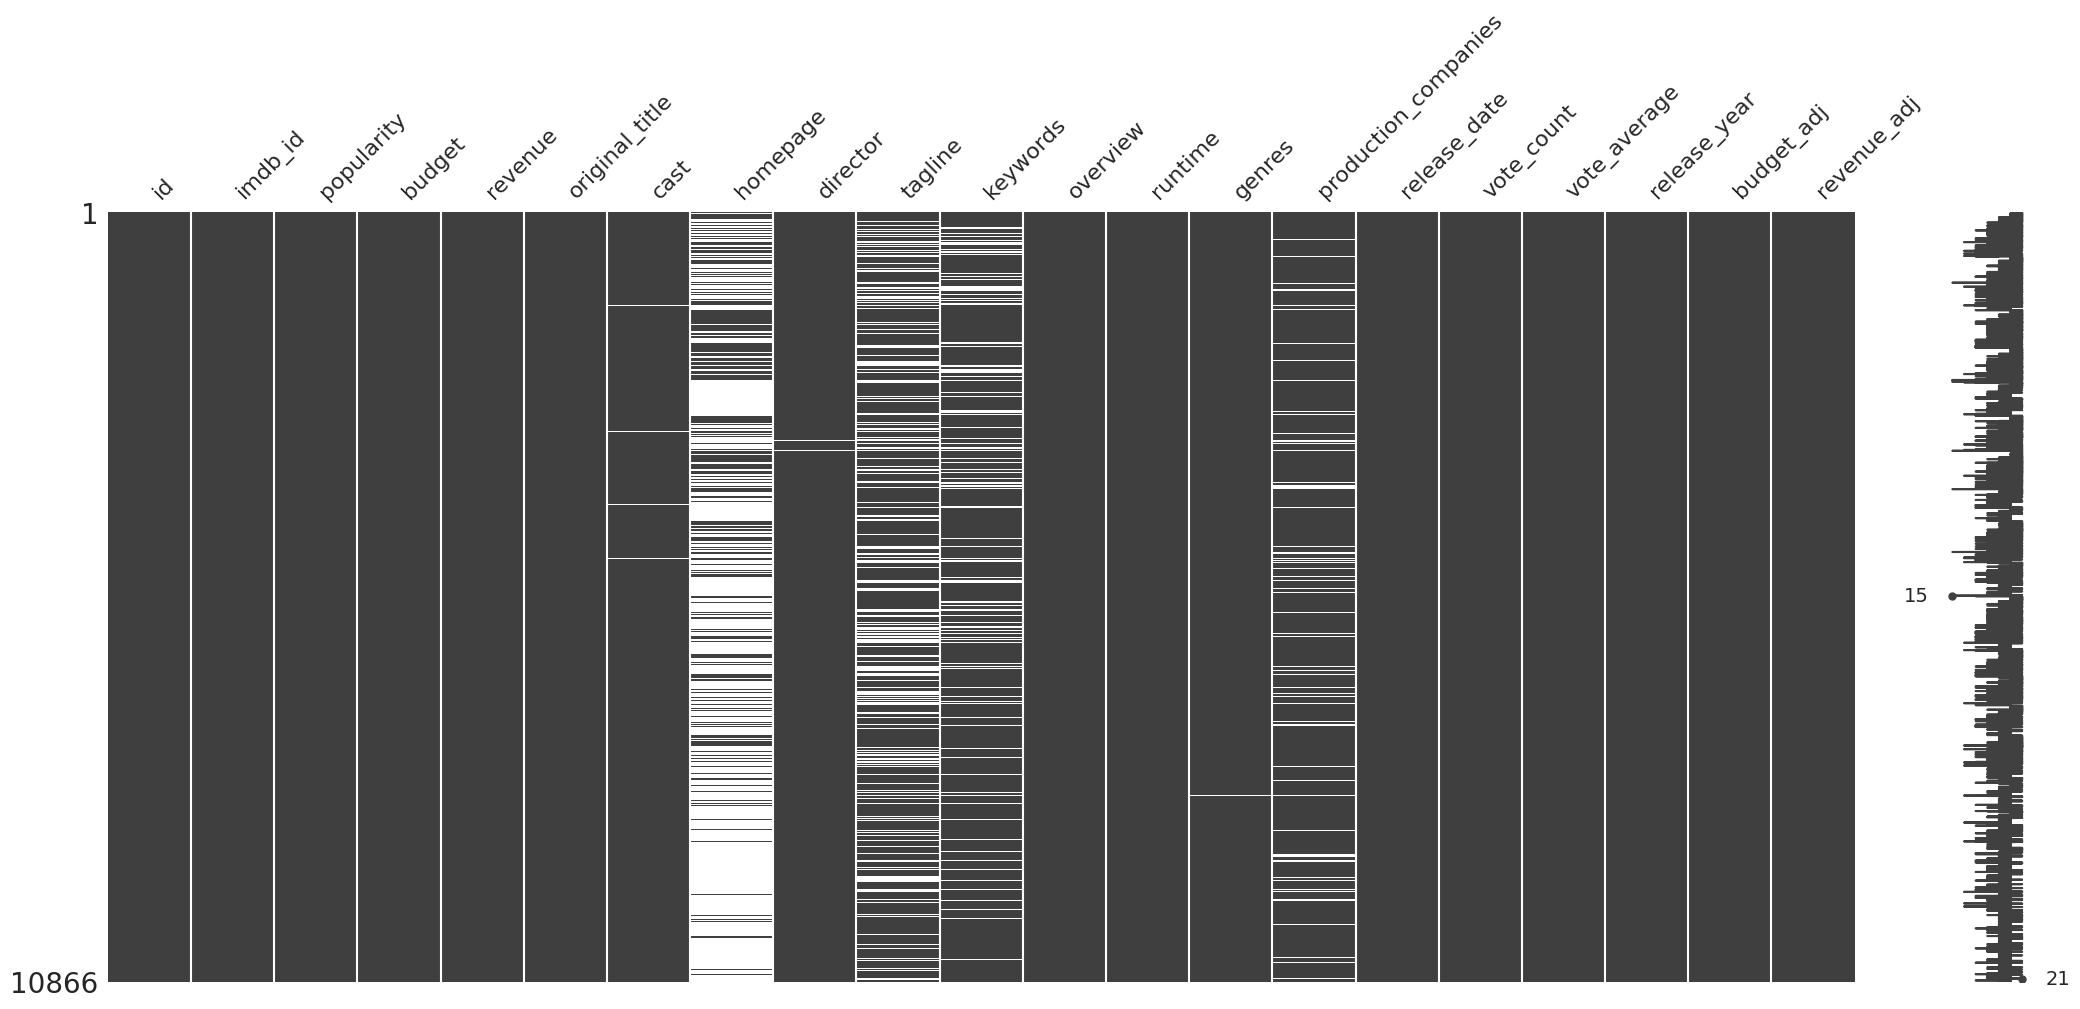

In [ ]:
import pandas as pd
import missingno as msno

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

msno.matrix(movie_data)


Realizo un analisis de las variables


In [ ]:
!pip install dataprep


In [ ]:

import pandas as pd
from dataprep.eda import create_report

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

report = create_report(movie_data)
report.show_browser()  # Muestra el informe en el navegador

# Opcionalmente, también puedes guardar el informe en un archivo HTML
report.save("movie_data_report.html")





/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is depreca

Report has been saved to movie_data_report.html!


In [ ]:

from google.colab import files
files.download('movie_data_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install markdown


In [ ]:
!pip install markdownify


In [ ]:
import markdown
with open('movie_data_report.html', 'r') as html_file:
    html_content = html_file.read()
markdown_content = markdown.markdown(html_content)
print(markdown_content)

Elimino 3 columnas que tienen demasiados nulls y que no soy útiles para el trabajo

In [6]:
movie_data = movie_data.drop(['homepage', 'tagline', 'keywords'], axis=1)


Realizamos limpieza de la base

In [7]:
#Eliminamos los duplicados, dejando solo el primero
movie_data.drop_duplicates(keep = 'first', inplace = True)




**Duración de las peliculas**

In [ ]:
movie_data.release_date = pd.to_datetime(movie_data['release_date'])


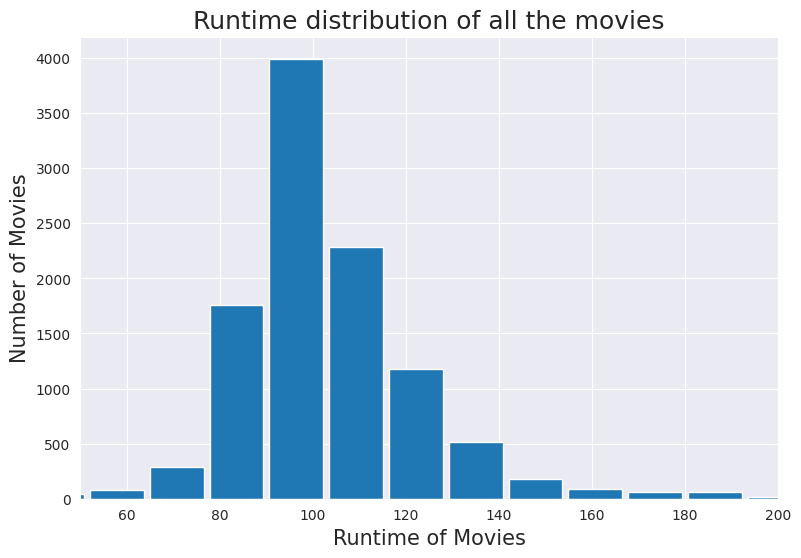

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiquetas de los ejes
plt.xlabel('Runtime of Movies', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18)

# Histograma con límites personalizados del eje x
plt.hist(movie_data['runtime'], rwidth=0.9, bins=70)
plt.xlim(50, 200)  # Establecer límites del eje x

# Mostrar el gráfico
plt.show()


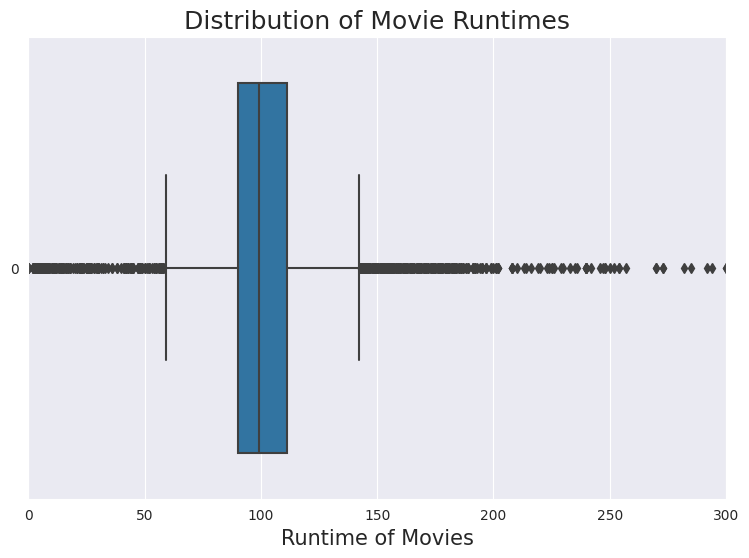

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Runtime of Movies', fontsize=15)
plt.title('Distribution of Movie Runtimes', fontsize=18)

# Gráfico de boxplot con orientación horizontal
sns.boxplot(data=movie_data['runtime'], orient='h')
plt.xlim(0, 300)

# Mostrar el gráfico
plt.show()



In [ ]:
# Función para calcular el promedio de una columna en particular
def average_func(column_name):
    return movie_data[column_name].mean()

# Obtenemos la duración promedio de las películas
duracion_promedio = average_func('runtime')

duracion_promedio = round(duracion_promedio)

# Imprimimos el resultado con un mensaje descriptivo
print("La duración promedio de las películas en el conjunto de datos es de aproximadamente", duracion_promedio, "minutos.")

La duración promedio de las películas en el conjunto de datos es de aproximadamente 102 minutos.


**Fechas de las peliculas**

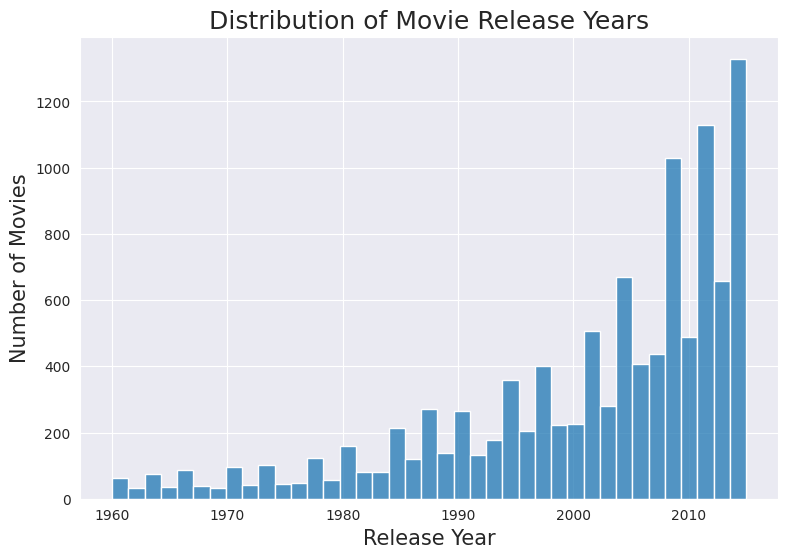

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Distribution of Movie Release Years', fontsize=18)

# Gráfico de histograma
sns.histplot(data=movie_data['release_year'], kde=False)

# Mostrar el gráfico
plt.show()


**Directores con más peliculas**


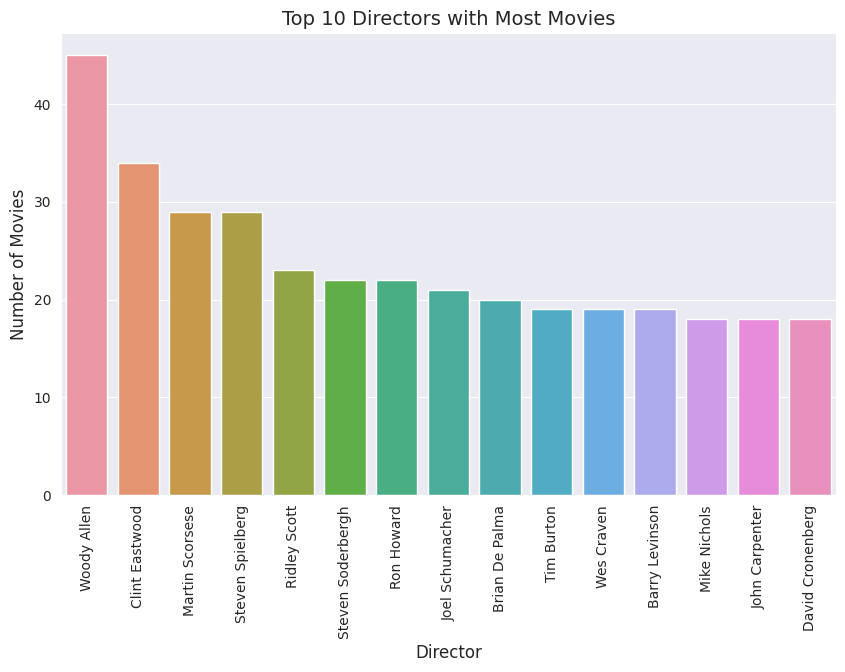

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el número de películas por director
director_counts = movie_data['director'].value_counts().head(15)

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(10, 6))

# Graficar el conteo de películas por director
sns.barplot(x=director_counts.index, y=director_counts.values)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establecer etiquetas de los ejes y título del gráfico
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Top 10 Directors with Most Movies', fontsize=14)

# Mostrar el gráfico
plt.show()



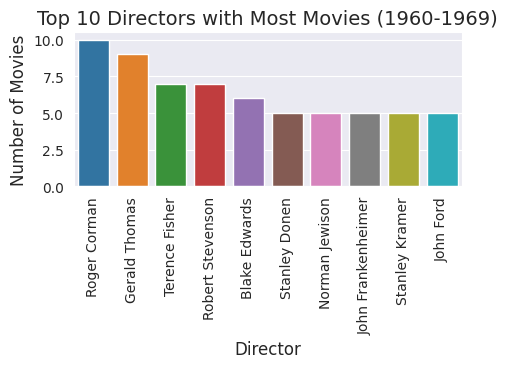

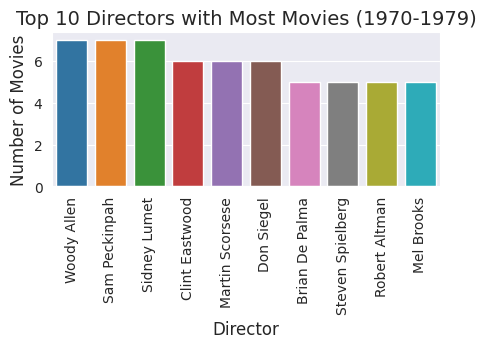

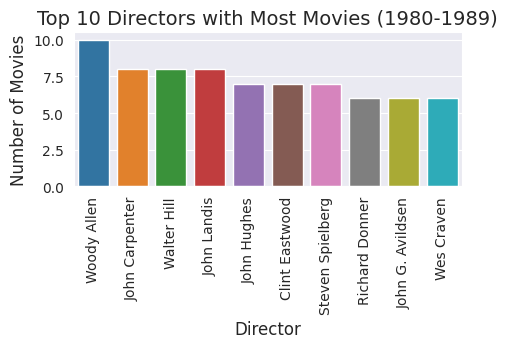

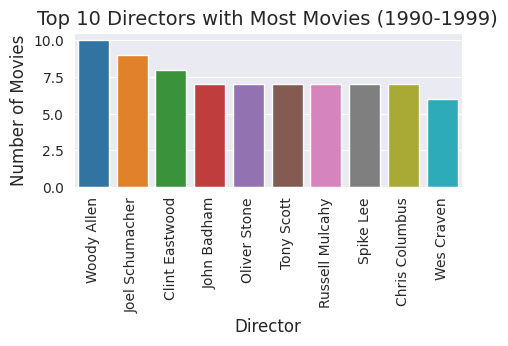

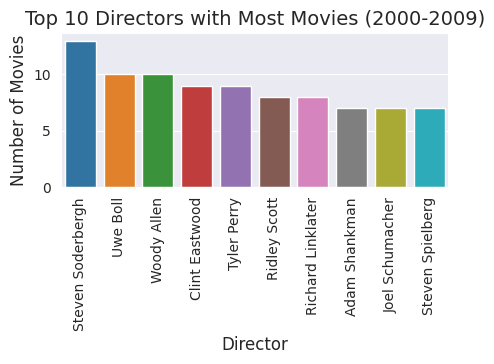

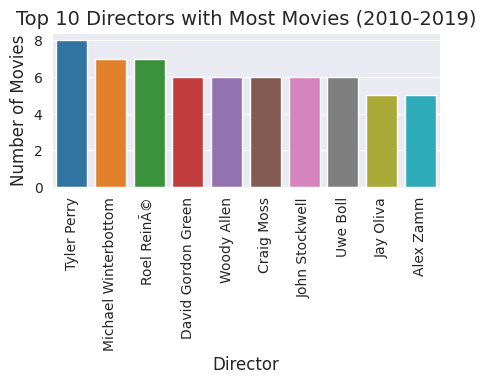

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'decade' basada en el año de lanzamiento
movie_data['decade'] = (movie_data['release_year'] // 10) * 10

# Filtrar el conjunto de datos para las décadas desde 1950 hasta 2010
decades = range(1950, 2021, 10)
decade_data = movie_data[movie_data['decade'].isin(decades)]

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear gráficos separados para cada década
for decade in decades:
    # Filtrar los datos para la década actual
    decade_movies = decade_data[decade_data['decade'] == decade]
    
    # Calcular el número de películas por director
    director_counts = decade_movies['director'].value_counts().head(10)
    
    # Verificar si hay datos disponibles para la década actual
    if not director_counts.empty:
        # Crear figura y establecer tamaño
        plt.figure(figsize=(5, 2))
        
        # Graficar el conteo de películas por director
        sns.barplot(x=director_counts.index, y=director_counts.values)
        
        # Rotar las etiquetas del eje x para una mejor visualización
        plt.xticks(rotation=90)
        
        # Establecer etiquetas de los ejes y título del gráfico
        plt.xlabel('Director', fontsize=12)
        plt.ylabel('Number of Movies', fontsize=12)
        plt.title(f'Top 10 Directors with Most Movies ({decade}-{decade+9})', fontsize=14)
        
        # Mostrar el gráfico
        plt.show()


**Voto promedio**

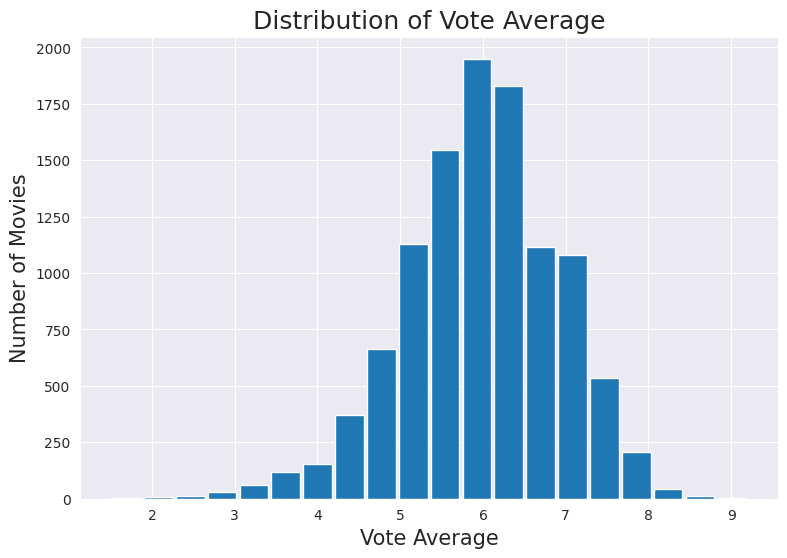

In [ ]:
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Vote Average', fontsize=15)
# Etiqueta del eje y
plt.ylabel('Number of Movies', fontsize=15)
# Título del gráfico
plt.title('Distribution of Vote Average', fontsize=18)

# Crear histograma de vote_average
plt.hist(movie_data['vote_average'], bins=20, rwidth=0.9)

# Mostrar el gráfico
plt.show()


**Directores con más puntaje**


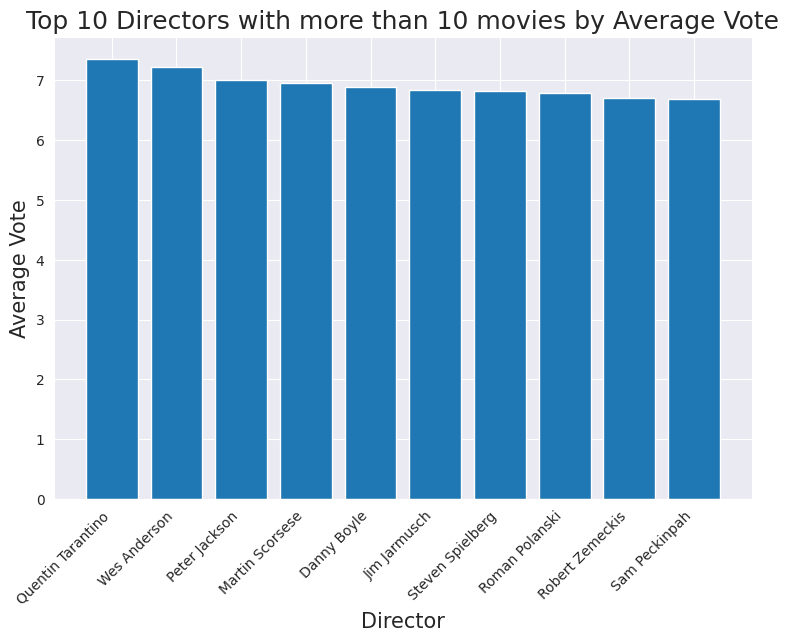

In [ ]:
# Contar el número de películas por director
movie_count_by_director = movie_data['director'].value_counts()

# Filtrar los directores que tienen más de 10 películas
directors_with_more_than_10_movies = movie_count_by_director[movie_count_by_director > 10].index

# Filtrar el DataFrame original solo para los directores seleccionados
filtered_movie_data = movie_data[movie_data['director'].isin(directors_with_more_than_10_movies)]

# Calcular el promedio de votos por director en el DataFrame filtrado
average_vote_by_director = filtered_movie_data.groupby('director')['vote_average'].mean()

# Ordenar los directores en orden descendente según el promedio de votos y seleccionar los 10 mejores
top_10_directors = average_vote_by_director.sort_values(ascending=False).head(10)

# Configurar estilos y tamaños de fuente
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiquetas del eje x e y
plt.xlabel('Director', fontsize=15)
plt.ylabel('Average Vote', fontsize=15)
# Título del gráfico
plt.title('Top 10 Directors with more than 10 movies by Average Vote', fontsize=18)

# Graficar los 10 mejores directores
plt.bar(top_10_directors.index, top_10_directors.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()



**Generos**

In [ ]:
import pandas as pd

# Dividir los géneros por el delimitador "|"
genres = movie_data['genres'].str.split('|', expand=True)

# Obtener la primera palabra de cada género
first_genre = genres[0]

# Contar el número de películas por género
genre_counts = first_genre.value_counts()

# Crear un DataFrame con los resultados
genre_table = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Mostrar la tabla
print(genre_table)



              Genre  Count
0             Drama   2453
1            Comedy   2319
2            Action   1590
3            Horror    915
4         Adventure    586
5          Thriller    491
6       Documentary    432
7         Animation    403
8             Crime    380
9           Fantasy    272
10  Science Fiction    214
11          Romance    186
12           Family    144
13          Mystery    125
14            Music    100
15         TV Movie     78
16              War     59
17          History     44
18          Western     42
19          Foreign      9


In [ ]:
import pandas as pd

# Dividir los géneros por el delimitador "|"
genres = movie_data['genres'].str.split('|', expand=True)

# Obtener la primera palabra de cada género
first_genre = genres[0]

# Contar el número de películas por género
genre_counts = first_genre.value_counts()

# Crear un DataFrame con los resultados
genre_table = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Mostrar la tabla
print(genre_table)



              Genre  Count
0             Drama   2453
1            Comedy   2319
2            Action   1590
3            Horror    915
4         Adventure    586
5          Thriller    491
6       Documentary    432
7         Animation    403
8             Crime    380
9           Fantasy    272
10  Science Fiction    214
11          Romance    186
12           Family    144
13          Mystery    125
14            Music    100
15         TV Movie     78
16              War     59
17          History     44
18          Western     42
19          Foreign      9


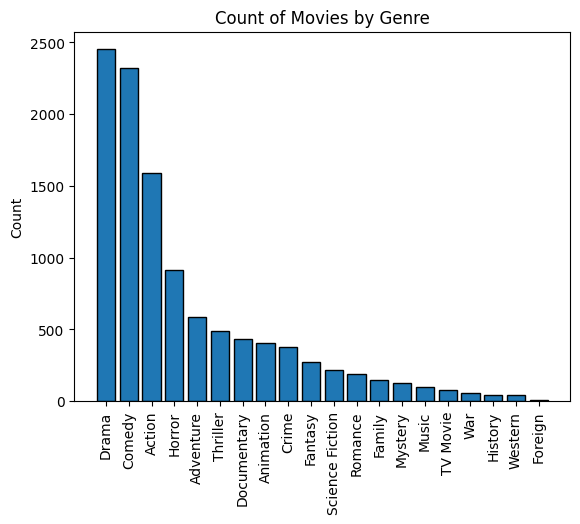

In [ ]:
import matplotlib.pyplot as plt

# Dividir los géneros por el delimitador "|"
genres = movie_data['genres'].str.split('|', expand=True)

# Obtener la primera palabra de cada género
first_genre = genres[0]

# Contar el número de películas por género
genre_counts = first_genre.value_counts()

# Crear el histograma
plt.bar(genre_counts.index, genre_counts.values, edgecolor='black')
plt.title('Count of Movies by Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

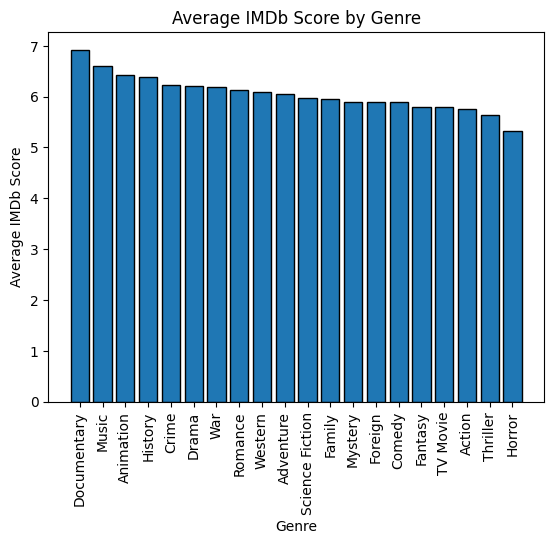

In [ ]:
import matplotlib.pyplot as plt

# Dividir los géneros por el delimitador "|"
genres = movie_data['genres'].str.split('|', expand=True)

# Obtener la primera palabra de cada género
first_genre = genres[0]

# Calcular el promedio de puntuación IMDb por género
genre_avg_score = movie_data.groupby(first_genre)['vote_average'].mean()

df = genre_avg_score.sort_values(ascending=False)

# Crear el histograma
plt.bar(df.index, df.values, edgecolor='black')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)

plt.show()


<Figure size 640x480 with 0 Axes>

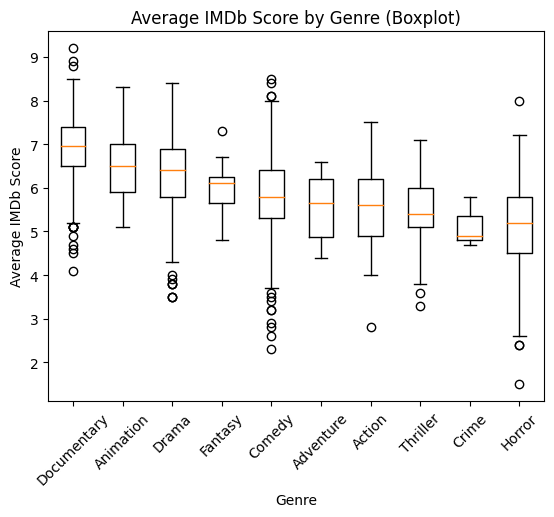

In [ ]:
# Crear una nueva figura
fig = plt.figure()

# Obtener los 10 géneros más comunes en orden descendente
top_genres = genre_table.sort_values('Count', ascending=False).head(10)

# Obtener los datos de puntuación IMDb por género
genres_data = movie_data[movie_data['genres'].isin(top_genres['Genre'])].groupby('genres')['vote_average']

# Ordenar los géneros por puntuación promedio del IMDb en orden descendente
top_genres = top_genres.merge(genres_data.mean().sort_values(ascending=False), left_on='Genre', right_index=True)
top_genres = top_genres.sort_values('vote_average', ascending=False)

# Crear una lista de arrays con las puntuaciones IMDb para cada género
data = [movie_data[movie_data['genres'] == genre]['vote_average'] for genre in top_genres['Genre']]

# Crear el gráfico de boxplot
fig, ax = plt.subplots()
ax.boxplot(data, labels=top_genres['Genre'])

# Establecer el título y las etiquetas de los ejes
ax.set_title('Average IMDb Score by Genre (Boxplot)')
ax.set_xlabel('Genre')
ax.set_ylabel('Average IMDb Score')

# Establecer el color de fondo en blanco
fig.set_facecolor("white")

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



**Production Companies**

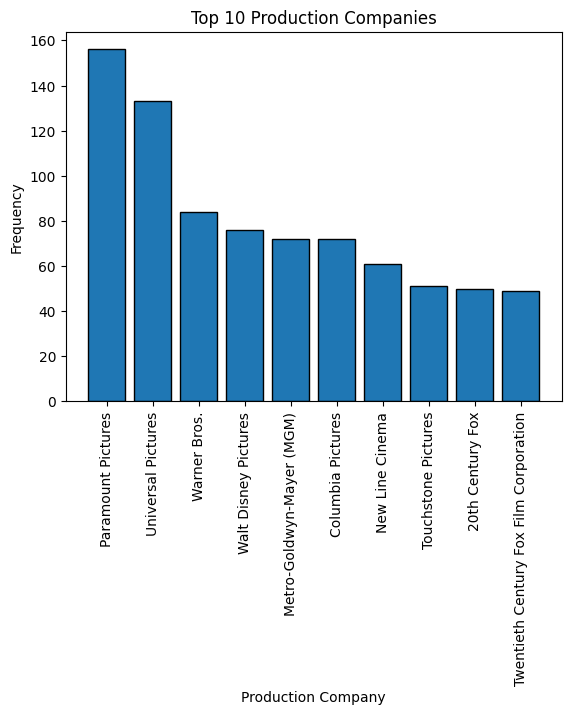

In [22]:
import matplotlib.pyplot as plt

# Obtener la cuenta de las compañías de producción
production_counts = movie_data['production_companies'].value_counts()

# Obtener las 10 compañías de producción más comunes
top_companies = production_counts.head(10)

# Crear el gráfico de barras
plt.bar(top_companies.index, top_companies.values, edgecolor='black')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()
